In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\duasp\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
#whole population
x = np.arange(1,101)

In [3]:
#random sample
y = np.array([67,98,34,7,89,58])

In [4]:
x.mean()

50.5

In [5]:
y.mean()

58.833333333333336

In [6]:
np.median(x)

50.5

In [7]:
np.median(y)

62.5

In [8]:
x.std(),y.std()

(28.86607004772212, 31.130995629579353)

In [9]:
y.shape

(6,)

In [10]:
x = np.arange(1,101)
sample = np.random.choice(x,size = 10)
sample

array([78,  5, 32, 19, 88, 22, 30, 87, 92, 81])

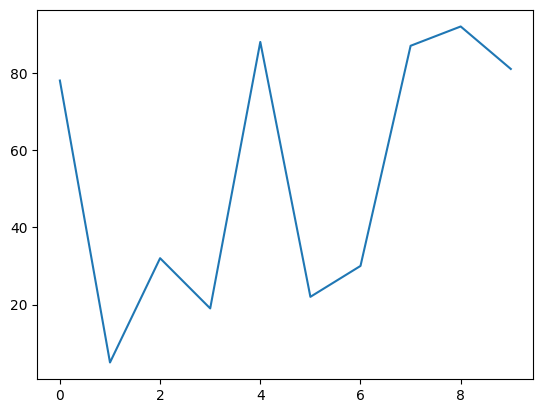

In [11]:
plt.plot(sample)
plt.show()

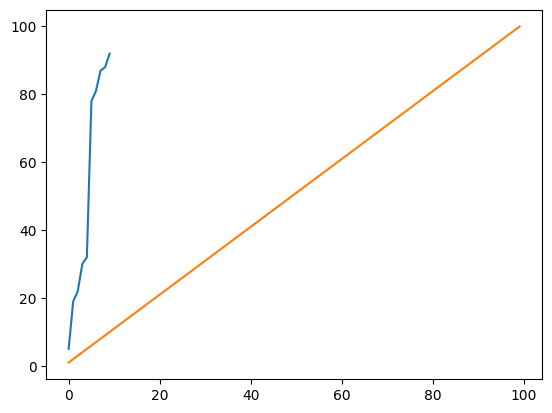

In [12]:
plt.plot(sorted(sample))
plt.plot(x)
plt.show()

### Stratified Sampling

In [13]:
df = pd.read_csv('loan-prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [14]:
df.shape

(614, 13)

In [15]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
x = df[['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']]
y = df['Loan_Status']

In [17]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

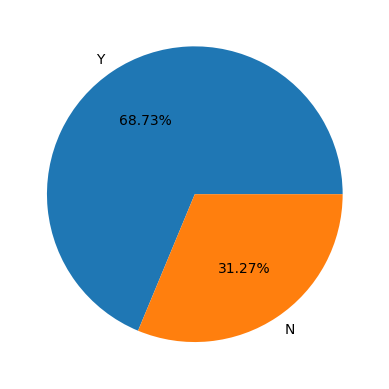

In [18]:
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = '%2.2f%%');

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0, stratify = y)

In [21]:
x.shape

(614, 11)

In [22]:
X_train.shape, X_test.shape

((411, 11), (203, 11))

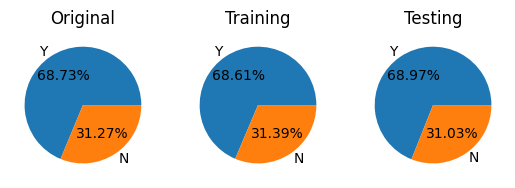

In [23]:
plt.subplot(1,3,1)
plt.title('Original')
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = '%2.2f%%');
plt.subplot(1,3,2)
plt.title('Training')
plt.pie(y_train.value_counts(),labels = y_train.value_counts().index, autopct = '%2.2f%%');
plt.subplot(1,3,3)
plt.title('Testing')
plt.pie(y_test.value_counts(), labels = y_test.value_counts().index, autopct = '%2.2f%%');

In [24]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 0, stratify = y)

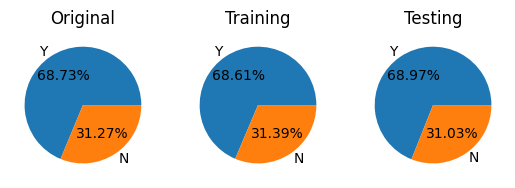

In [25]:
plt.subplot(1,3,1)
plt.title('Original')
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = '%2.2f%%');
plt.subplot(1,3,2)
plt.title('Training')
plt.pie(y_train.value_counts(),labels = y_train.value_counts().index, autopct = '%2.2f%%');
plt.subplot(1,3,3)
plt.title('Testing')
plt.pie(y_test.value_counts(), labels = y_test.value_counts().index, autopct = '%2.2f%%');

### Systematic Sampling

In [26]:
df.iloc[[i for i in range(0,613,10)],:].shape

(62, 13)

In [27]:
df.iloc[::10]

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
10,LP001024,Male,Yes,2,Graduate,No,3200,700.0,70.0,360.0,1.0,Urban,Y
20,LP001043,Male,Yes,0,Not Graduate,No,7660,0.0,104.0,360.0,0.0,Urban,N
30,LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
40,LP001119,Male,No,0,Graduate,No,3600,0.0,80.0,360.0,1.0,Urban,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570,LP002842,Male,Yes,1,Graduate,No,3417,1750.0,186.0,360.0,1.0,Urban,Y
580,LP002892,Male,Yes,2,Graduate,No,6540,0.0,205.0,360.0,1.0,Semiurban,Y
590,LP002928,Male,Yes,0,Graduate,No,3000,3416.0,56.0,180.0,1.0,Semiurban,Y
600,LP002949,Female,No,3+,Graduate,NaN,416,41667.0,350.0,180.0,NaN,Urban,N


In [28]:
df = pd.read_csv('creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [29]:
df.shape

(284807, 31)

In [30]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [31]:
x = df.drop('Class', axis = 1)

In [32]:
y = df['Class']

In [33]:
set(y)

{0, 1}

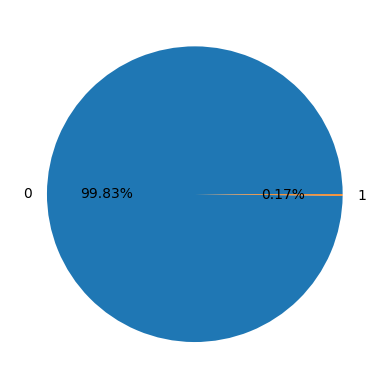

In [34]:
plt.pie(y.value_counts(), labels = y.value_counts().index, autopct = '%2.2f%%');

In [35]:
y.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [36]:
#pip install scikit-learn

In [37]:
#pip install imbalanced-learn

In [38]:
import sklearn

In [39]:
sklearn.__version__

'1.2.2'

In [46]:
#!pip install scikit-learn==1.2.2

### Random Under Sampler

In [47]:
from imblearn.under_sampling import RandomUnderSampler

In [48]:
rus = RandomUnderSampler(random_state = 0)

In [49]:
x_new, y_new = rus.fit_resample(x, y)

In [50]:
y_new.shape

(984,)

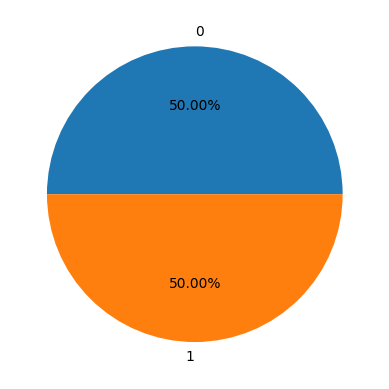

In [52]:
plt.pie(y_new.value_counts(), labels = y_new.value_counts().index, autopct = '%2.2f%%');

### Over Sampling

In [53]:
from imblearn.over_sampling import RandomOverSampler

In [54]:
ros = RandomOverSampler(random_state = 0)
x_new, y_new = ros.fit_resample(x,y)

In [55]:
y_new.shape

(568630,)

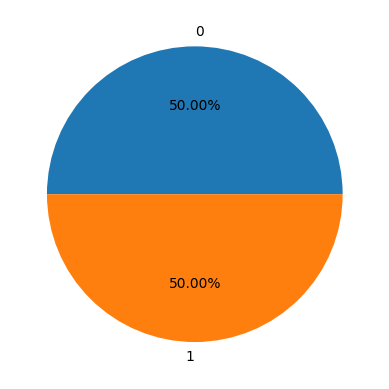

In [56]:
plt.pie(y_new.value_counts(), labels = y_new.value_counts().index, autopct = '%2.2f%%');

### Smote

In [61]:
from imblearn.over_sampling import SMOTE

In [62]:
smo = SMOTE(random_state = 0)

In [63]:
x_new, y_new = smo.fit_resample(x,y)

AttributeError: 'NoneType' object has no attribute 'split'

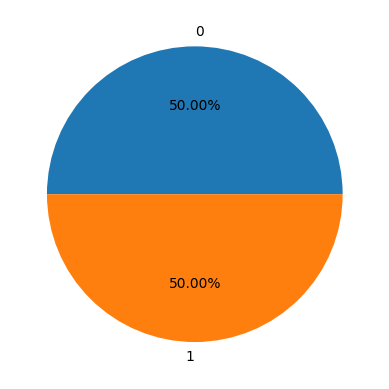

In [64]:
plt.pie(y_new.value_counts(), labels = y_new.value_counts().index, autopct = '%2.2f%%');

### Random Normal Sampling

In [65]:
samples = np.random.normal(0,1,size = 1000)

<Axes: ylabel='Density'>

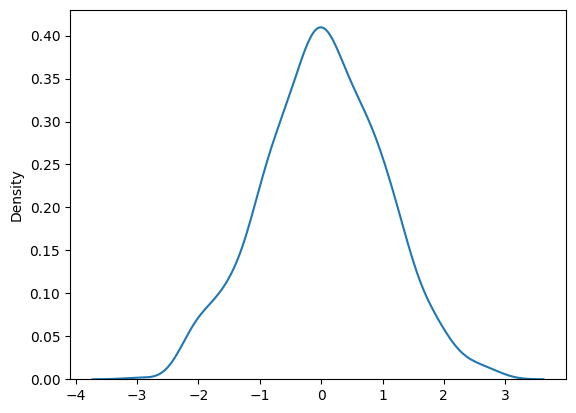

In [66]:
sns.kdeplot(samples)

In [69]:
samples[:10]

array([-0.42424231, -1.5378441 , -0.61220765, -0.29442948,  1.3536791 ,
        0.20910582,  0.00717971,  0.40039134, -0.16474316, -1.50204146])

<Axes: ylabel='Density'>

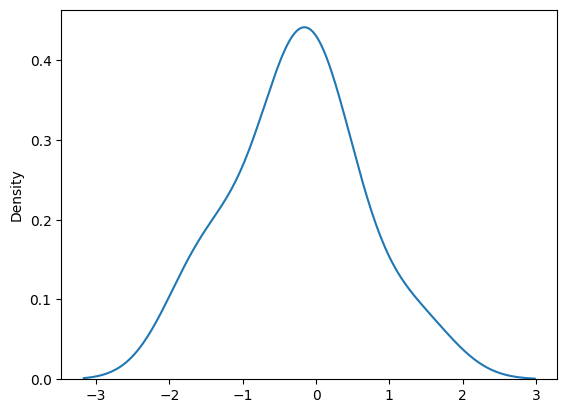

In [70]:
sns.kdeplot(samples[:10])